In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

import seaborn as sns
import pandas as pd

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    ax = sns.heatmap(cm, cmap = sns.color_palette("Blues"), annot=True, xticklabels=classes, yticklabels=classes)

    ax.set(title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the x labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Vertically center y labels
    plt.setp(ax.get_yticklabels(), va="center")
    
    return ax

In [4]:
plt.rcParams['figure.figsize'] = [10, 10]

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


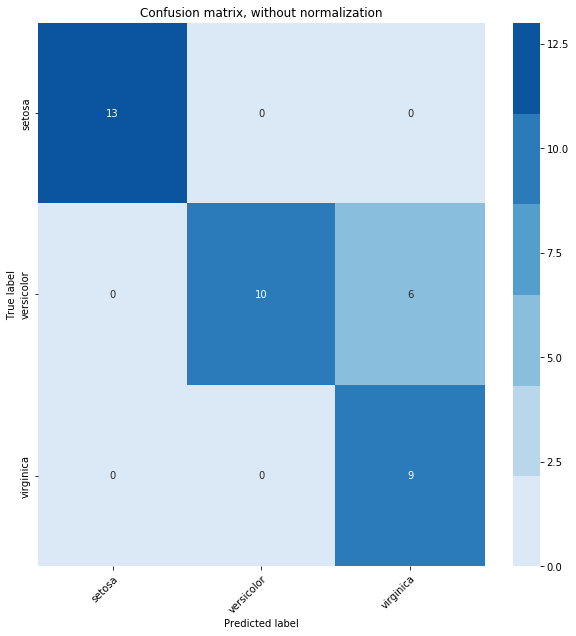

In [5]:
# Plot non-normalized confusion matrix
ax = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig('confusion_matrix_test.png', bbox_inches="tight")

Normalized confusion matrix
[[1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.    1.   ]]


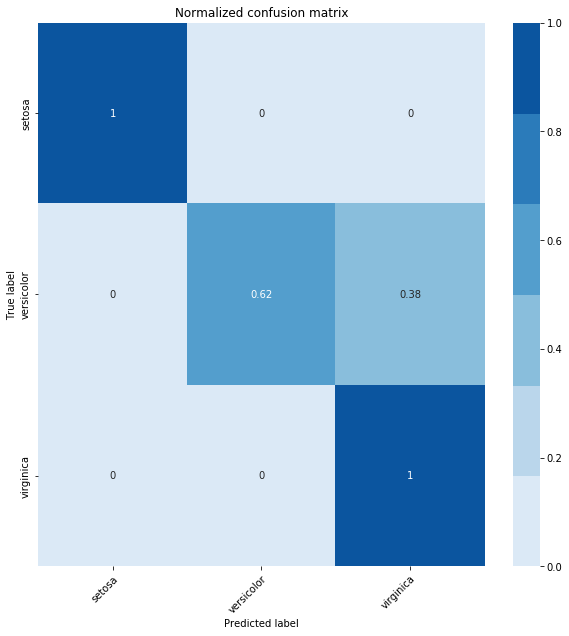

In [6]:
# Plot normalized confusion matrix
ax = plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig('confusion_matrix_test_normalized.png', bbox_inches="tight")